# Pràctica 1:

Nom dels alumnes del grup:
> NIL TORRELLES PUENTE

>ARTURO LATORRE CASTELLTORT

> Recordeu que, tot i que la pràctica es fa en parelles, els dos membres del grup han de lliurar al campus virtual aquest notebook.

# Anàlisi exploratòria de dades (EDA) & ús d'eines avançades de Python

L'**anàlisi exploratòria de dades** (EDA, per les seves sigles en anglès, *Exploratory Data Analysis*) és un procés crític en la ciència de les dades que implica **explorar, resumir i visualitzar** les dades per a entendre les seves característiques principals. L'objectiu principal de l'EDA és revelar patrons, tendències i anomalies a partir de les dades, sense fer suposicions massa específiques o construir models massa complexes.

Aquí teniu alguns dels elements més importants de l'anàlisi exploratòria de dades:

+ **Visualització de dades**: A través de gràfics i gràfiques, es representen les dades per a veure distribucions, tendències i relacions. Això pot incloure histogrames, gràfics de barres, diagrames de dispersió, gràfics de caixa, etc.

+ **Estadístiques descriptives**: Es calculen estadístiques com la mitjana, la mediana, la desviació estàndard i altres mesures resum per a descriure les característiques bàsiques de les variables.

+ **Detecció d'anomalies**: Es busca identificar valors atípics o anòmals que puguin indicar errors o situacions especials en les dades.

+ **Imputació de dades faltants**: Si les dades tenen buits o valors faltants, es pot decidir com omplir aquests buits de manera adequada.

+ **Exploració de relacions**: Es busquen correlacions i relacions entre les diferents variables de les dades per a identificar connexions i dependencies.

+ **Agrupació de dades**: Es divideixen les dades en subconjunts basats en certes característiques per a analitzar-les més detingudament.

+ **Transformació de dades**: Es poden aplicar transformacions a les dades per a fer-les més adequades per a anàlisi posterior, com l'estandardització o la normalització.

* **Selecció de característiques**: Si es treballa amb un conjunt de dades amb moltes variables, es pot realitzar una selecció de característiques per a reduir la complexitat i millorar l'eficiència de l'anàlisi.

Python ofereix una àmplia gamma d'eines i biblioteques per a realitzar l'anàlisi exploratòria de dades (EDA). Algunes de les biblioteques més populars i útils són les següents:

+ **NumPy**: NumPy és una biblioteca fonamental per a la computació científica en Python. Proporciona funcionalitats per a treballar amb matrius i vectors, la qual cosa és essencial per a l'anàlisi de dades.

+ **Pandas**: Pandas és una biblioteca molt popular per a l'anàlisi de dades que ofereix estructures de dades com DataFrame i Series, que faciliten la manipulació i anàlisi de dades tabulars. Podeu utilitzar Pandas per a carregar, netejar i explorar les dades.

+ **Matplotlib**: Matplotlib és una biblioteca per a la visualització de dades que us permet crear una àmplia gamma de gràfics i gràfiques personalitzades. És ideal per a crear histogrames, diagrames de dispersió, gràfics de barres i moltes altres representacions gràfiques.

+ **Scipy**: SciPy és una biblioteca que amplia les funcionalitats de NumPy i proporciona eines addicionals per a l'anàlisi científic, inclosos estadístics i mètodes d'optimització.

+ **Scikit-learn**: Si esteu interessats en l'aprenentatge automàtic, Scikit-learn és una biblioteca essencial que ofereix eines per a la classificació, regressió, agrupació i altres tasques d'aprenentatge automàtic. També conté eines per a la selecció de característiques.

+ **Seaborn**: Seaborn és una biblioteca de visualització de dades basada en Matplotlib que simplifica la creació de gràfics estadístics atractius i informatius. És especialment útil per a la visualització de relacions i tendències en les dades.

## 0. Objectiu de la pràctica

L'**objectiu d'aquesta pràctica** és aprendre com fer una exploració sobre un conjunt de dades real, que al final ens permeti obtenir la resposta a diverses preguntes.

En aquesta pràctica explorarem les dades dels trajectes dels **taxis grocs de la ciutat de Nova York** durant varios anys.

En finalitzar aquesta pràctica, haureu de ser capaços de respondre la pregunta següent de forma detallada:

- **Com va afectar la pandèmia de la Covid l'ús dels taxis a Nova York?**

Pere respondre aquesta pregunta tant genèrica, ho descomposarem en preguntes més concretes:

- Quina distribució d'encàrrecs segueixen els taxis i quina distància / durada tenen?
- Quines són les zones on m'és / menys taxis s'agafen?
- Quins horaris són els més usuals?
- Quins dies de la setmana i del mes s'utilitzen més?
- Etc.

### Instal·lació i importació de les llibreries necessàries

A més a més de les llibreries comentades, farem servir aquests mòduls de Python:

+ **PyArrow**: PyArrow és una biblioteca de Python que es fa servir per a l'intercanvi eficient de dades entre Python i altres llenguatges de programació, especialment C++ i Java. Aquesta biblioteca es desenvolupa com a part del projecte Apache Arrow, que és un projecte de codi obert dissenyat per a millorar el rendiment i la interoperabilitat de l'analítica de dades i les tecnologies relacionades. PyArrow permet la creació i la manipulació eficient de dades en forma de taules i columnes. PyArrow ofereix suport per a l'estructura de dades coneguda com a "Table", que és similar a una taula o un quadern de dades en altres llenguatges. Aquesta estructura de dades facilita l'organització i la manipulació de dades tabulars.
+ **pyshp** és una biblioteca de Python que es fa servir per a llegir i escriure arxius en el format de fitxers de forma (shapefiles). El format de fitxers de forma és un format estàndard en geoinformàtica i geodèsia per a emmagatzemar i intercanviar dades geoespacials, com ara punts, línies i polígons, juntament amb les seves propietats associades.
+ **shapely** és una biblioteca de Python que es fa servir per a realitzar operacions geomètriques i anàlisi espacial amb objectes geoespacials. Aquesta biblioteca és especialment útil per a treballar amb geometria plana, com ara punts, línies i polígons, i permet realitzar una àmplia gamma d'operacions, com ara interseccions, unions, àrees, longituds i moltes altres.
+ **descartes** és una biblioteca de tercers que es fa servir per a la visualització de gràfics geoespacials.

In [3]:
%%capture
! pip install pyarrow
! pip install pyshp==2.1.3
! pip install shapely==1.7.1
! pip install pandas==1.5.3
! pip install numpy==1.22
! pip install descartes==1.1.0

In [4]:
import pandas as pd
import numpy as np
import urllib.request
import zipfile
import os
from tqdm.notebook import tqdm
import pyarrow.parquet as pq

In [5]:
import shapefile
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Descàrrega de dades

In [6]:
# Variables globals: els anys que estudiarem
YEARS = [2019, 2020, 2021]

In [7]:
# Descàrrega de les dades: Trip Record Data
# https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

for year in tqdm(YEARS):
    if not os.path.exists(f'data/{year}'):
        os.makedirs(f'data/{year}', exist_ok=True)
        for month in tqdm(range(1, 13)):
            urllib.request.urlretrieve(f'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month:02d}.parquet', f'data/{year}/{month:02d}.parquet')

  0%|          | 0/3 [00:00<?, ?it/s]

## 2. Neteja de dades

Per tal de tenir unes dades netes i útils, eliminarem totes aquells trajectes (files del conjunt de dades)  que continguin informació *corrupte*. Per exemple, com a mínim cal verificar que no es dóna cap d'aquests casos:

- Presència de *missing data* (camps/columnes de les dades sense valor).
- L'hora de recollida és posterior a la finalització del trajecte.
- Les dades s'importen per mes i any. Són coherents els valors que contenen les dades?
- Hi ha viatges amb un nombre absurd de passatgers?
- Hi ha viatges massa llargs o massa curts?
- Hi ha pagaments negatius?
- Etc.

A més a més, podem considerar aspectes concrets d'aquestes dades:

+ Hi pot haver viatges impossibles segons la normativa:
    + [Més viatgers que els permesos](https://www1.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page) o [velocitats il·legals](https://www.speed-limits.com/newyork).
    + [Limit de persones permeses a un yellow taxicab](https://drive.google.com/file/d/1eiV7wdm7WrkRlM9bmekCRM6GY3Yq6GI2/view?usp=sharing)

De totes les columnes que tenen les dades, només cal fer servir les següents per contestar les preguntes:

- *tpep_pickup_datetime*: The date and time when the meter was engaged.
- *tpep_dropoff_datetime*: The date and time when the meter was disengaged.
- *Passenger_count*: The number of passengers in the vehicle.
- *Trip_distance*: The elapsed trip distance in miles reported by the taximeter.
- *PULocationID*: TLC Taxi Zone in which the taximeter was engaged
- *DOLocationID*: TLC Taxi Zone in which the taximeter was disengaged
- *Payment_type*: A numeric code signifying how the passenger paid for the trip.
    - 1= Credit card
    - 2= Cash
    - 3= No charge
    - 4= Dispute
    - 5= Unknown
    - 6= Voided trip
- *Fare_amount*: The time-and-distance fare calculated by the meter.
- *Total_amount*: The total amount charged to passengers.

In [8]:
# carreguem les dades a un dataframe de pandas
# Per agilitzar els càlculs i reduir el temps de càlcul durant el desenvolupament,
# podeu treballarem amb una mostra uniforme de les dades (1 fila de cada 1000).

def load_table(year, month, sampling = 1000):
    """
    Funció que llegeix les dades descarregades i les converteix a un DataFrame
    """
    data = pq.read_table(f'data/{year}/{str(month).zfill(2)}.parquet').to_pandas()
    required_data = ['tpep_pickup_datetime',
                 'tpep_dropoff_datetime',
                 'passenger_count',
                 'trip_distance',
                 'PULocationID',
                 'DOLocationID',
                 'payment_type',
                 'fare_amount',
                 'total_amount']
    return data[required_data][::sampling]

# explorem una mica les dades
test = load_table(2019, 1)
test.shape

(7697, 9)

In [9]:
test.tail(20)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
7677000,2019-01-10 23:13:00,2019-01-10 23:15:00,NaN,0.00,114,114,0,0.00,0.0
7678000,2019-01-11 18:03:50,2019-01-11 19:03:17,NaN,12.86,222,13,0,69.69,78.5
7679000,2019-01-13 13:30:35,2019-01-13 14:06:58,NaN,11.64,261,243,0,54.25,57.3
7680000,2019-01-14 16:59:00,2019-01-14 17:27:00,NaN,7.45,161,196,0,45.29,54.6
7681000,2019-01-15 15:16:00,2019-01-15 15:44:00,NaN,5.21,150,178,0,28.95,32.5
7682000,2019-01-16 12:44:22,2019-01-16 13:27:11,NaN,12.80,82,117,0,51.55,54.6
7683000,2019-01-17 08:30:00,2019-01-17 09:14:00,NaN,7.24,129,142,0,32.45,36.0
7684000,2019-01-18 06:54:00,2019-01-18 07:27:00,NaN,12.71,89,161,0,45.51,54.6
7685000,2019-01-18 23:02:37,2019-01-18 23:15:39,NaN,5.13,78,208,0,29.45,32.5
7686000,2019-01-21 05:57:00,2019-01-21 06:19:00,NaN,11.99,216,226,0,51.05,54.6


###  Exercici A

+ Un cop llegides les dades a una taula de Pandas, implementa una funció que faci el procés de neteja que consideris necessari. Per determinar què és necessari, explora els valors que apareixen a cada columna del dataframe de Pandas i decideix què cal fer.

> *Nota: Les columnes `Datatime` són un subtipus de dades de Pandas anomenades `datetime`.  Busca com tractar de forma eficient aquest tipus de dades en Pandas.*

In [10]:
def clean_data(data, year, month):
 # Eliminar files amb missing data
    data.dropna(inplace=True)

    # Filtrar les files on l'hora de recollida és anterior a la finalització del trajecte
    data = data[data['tpep_pickup_datetime'] < data['tpep_dropoff_datetime']]

    # Filtrar les dades segons l'any i el mes especificats
    data = data[(data['tpep_pickup_datetime'].dt.year == year) &
                (data['tpep_pickup_datetime'].dt.month == month)]

    # Filtrar viatges amb un nombre raonable de passatgers (segons normativa -> màxim 5 passatgers en Taxis especials i més de 0)
    data = data[data['passenger_count'] < 6]

    data = data[data['passenger_count'] > 0]

    # Filtrar viatges amb distàncies raonables
    data = data[(data['trip_distance'] >= 0.1) & (data['trip_distance'] <= 100)]

    # Filtrar pagaments positius
    data = data[data['fare_amount'] >= 0]
    data = data[data['total_amount'] >= 0]

    # Evitar errors al exercici 6, ja que hi han 263 localitzacion i havia per exemple la 264 sense latitut ni longitut
    data = data[data['PULocationID'] <= 263]
    data = data[data['DOLocationID'] <= 263]

    return data

cleaned_data = clean_data(test, 2019, 1)

In [11]:
cleaned_data.tail(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount
7657000,2019-01-31 23:52:46,2019-01-31 23:55:14,1.0,0.39,170,137,1,4.0,6.36
7658000,2019-01-31 23:47:16,2019-01-31 23:52:47,2.0,0.57,170,164,1,5.5,8.16
7659000,2019-01-31 23:10:10,2019-01-31 23:44:16,1.0,19.50,132,24,1,52.0,76.11
7660000,2019-01-31 23:42:29,2019-01-31 23:50:55,5.0,1.69,164,107,1,7.5,10.56
7661000,2019-01-31 23:56:12,2019-02-01 00:19:36,1.0,10.71,138,17,1,31.5,36.80
7662000,2019-01-31 23:37:30,2019-01-31 23:53:20,1.0,2.70,249,161,1,12.5,16.55
7663000,2019-01-31 23:11:50,2019-01-31 23:19:35,2.0,1.88,237,48,2,8.0,9.30
7664000,2019-01-31 23:04:22,2019-01-31 23:12:26,1.0,1.19,161,161,1,7.5,10.38
7665000,2019-01-31 23:19:27,2019-01-31 23:36:55,3.0,5.22,90,74,1,17.5,22.56
7666000,2019-01-31 23:34:21,2019-02-01 00:25:34,2.0,12.20,48,36,1,41.5,53.45


###  Exercici B

+ Escriu una funció que transformi la taula original a una nova taula, més adequada per tal de dur a terme l'exploració necessària. Podeu afegir columnes addicionals, precalcular valors, etc.

> Per exemple, podem trasnformar les dades per treballar amb les unitats de kilòmetres i hores per a representar les durades, distàncies i velocitats del trajecte. El motiu és, per una banda, que estem familiaritzades amb el Sistema Internacional d'Unitats (d'aquí el canvi de milles a km). I per altra, optar pels km i no pels metres degut a l'ordre de magnitud de les dades.

In [12]:
def post_processing(data):
    """
    Funció on implementar qualsevol tipus de postprocessament necessari.
    """
    # Convertir la distància de milles a quilòmetres (1 milla = 1.60934 km)
    # sobreescrivim
    data['trip_distance'] = data['trip_distance'] * 1.60934

    # Calcular la durada del trajecte en hores
    data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 3600

    # Calcular la velocitat mitjana (km/h)
    data['speed'] = data['trip_distance'] / data['trip_duration']

    #No velocitats negatives ni aturat
    data = data[data['speed'] > 0]

    #No velocitats majors a 55 mph = 55 * 1.60934 = 88.5137 kph
    data = data[data['speed'] < 88.5137]

    # Evitar errors al exercici 6, ja que hi han 263 localitzacion i havia per exemple la 264 sense latitut ni longitut
    data = data[data['PULocationID'] <= 263]
    data = data[data['DOLocationID'] <= 263]

    return data

post_process = post_processing(cleaned_data)

In [13]:
post_process.tail()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,trip_duration,speed
7662000,2019-01-31 23:37:30,2019-01-31 23:53:20,1.0,4.345218,249,161,1,12.5,16.55,0.263889,16.466089
7663000,2019-01-31 23:11:50,2019-01-31 23:19:35,2.0,3.025559,237,48,2,8.0,9.30,0.129167,23.423684
7664000,2019-01-31 23:04:22,2019-01-31 23:12:26,1.0,1.915115,161,161,1,7.5,10.38,0.134444,14.244654
7665000,2019-01-31 23:19:27,2019-01-31 23:36:55,3.0,8.400755,90,74,1,17.5,22.56,0.291111,28.857555
7666000,2019-01-31 23:34:21,2019-02-01 00:25:34,2.0,19.633948,48,36,1,41.5,53.45,0.853611,23.001045


Amb això podem crear un nou dataset (una única taula) que contingui tota la informació dels anys: 2019, 2020, 2021.

In [14]:
df = pd.concat([clean_data(load_table(year, month), year, month)
                for year in tqdm(YEARS)
                for month in tqdm(range(1, 13), leave = False)])
df = post_processing(df)
df.shape

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

(128062, 11)

In [15]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,trip_duration,speed
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,2.414010,151,239,1,7.0,9.95,0.111111,21.726090
1000,2019-01-01 00:53:09,2019-01-01 01:01:16,1.0,3.073839,148,137,2,8.5,9.80,0.135278,22.722427
3000,2019-01-01 00:54:46,2019-01-01 01:03:13,1.0,2.253076,249,164,1,7.5,11.40,0.140833,15.998173
4000,2019-01-01 00:09:29,2019-01-01 00:12:29,2.0,1.078258,162,137,2,4.0,5.30,0.050000,21.565156
5000,2019-01-01 00:29:00,2019-01-01 00:46:19,1.0,4.361311,161,262,1,13.5,17.76,0.288611,15.111377


## 3. Visualització de dades anuals

Començarem per obtenir una resposta quantitativa a la pregunta **S'ha incrementat o ha disminuït amb la covid la quantitat de viatges anuals fets amb taxis?**, n'hi ha prou amb crear una figura de barres on es visualitzin la quantitat de viatges per any.

### Exercici C

+ Escriu una funció basada en `matplotlib` que generi aquesta gràfica.

In [16]:
def bar_plot(df, column, xlabel, ylabel, title):
    """
    Funció que crea una figura de barres a partir del dataframe i
    la columna que conté la informació
    """
    # CREEM una copia per aixi no crear noves columnes
    df_copy = df.copy()

    # Afegim les columnes any i mes per aixi buscar l'any
    df_copy['year'] = df_copy[column].dt.year
    df_copy['month'] = df_copy[column].dt.month


    if 'year' in df_copy.columns:
        year_unique = df_copy['year'].unique()
        #En cas que no demanem un any, es a dir, tot el conjunt, realitzarem el grafic per mesos.
        if len(year_unique) == 1:
            year = year_unique[0]
            df_filtered = df_copy[df_copy['year'] == year]
            data_grouped = df_filtered.groupby('month').size()

            # GRAFIC PER MESOS:
            plt.figure(figsize=(10, 6))
            data_grouped.plot(kind='bar', color='blue', alpha=0.7)
            plt.xlabel('Mes')
            plt.ylabel('Quantitat de Viatges')
            plt.title(f'Quantitat de viatges per mes ({year})')
            plt.xticks(rotation=0)
            plt.tight_layout()
            plt.show()
            return

    # En cas contrari, farem el sumatori per anys
    data_grouped = df_copy.groupby('year').size()

    # GRAFIC PER ANYS:
    plt.figure(figsize=(10, 6))
    data_grouped.plot(kind='bar', color='blue', alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    #Eliminem la copia
    del df_copy

+ Visualitza el nombre de viatges de cada any.

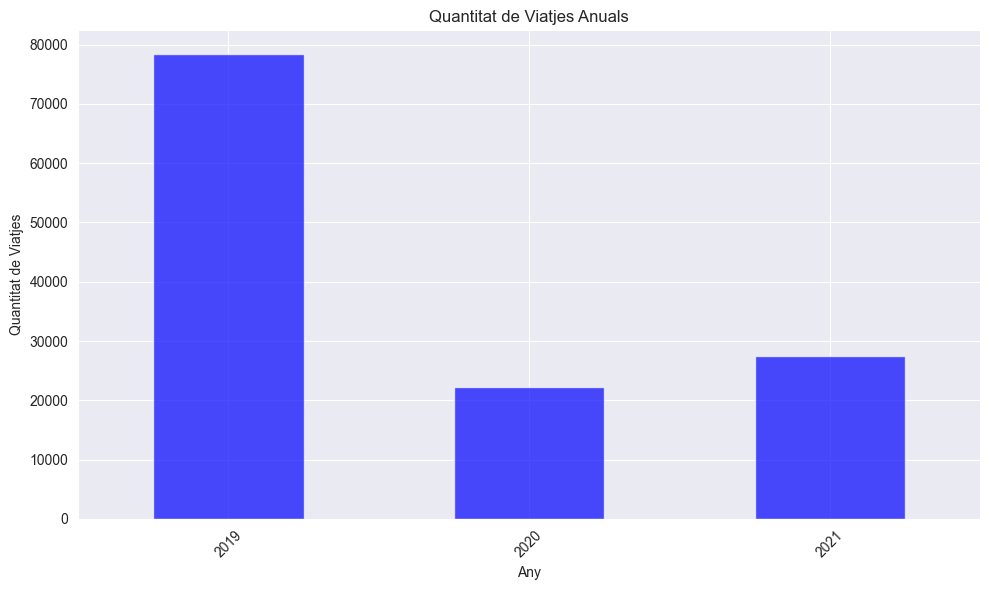

In [17]:
# Llama a la función bar_plot con los datos filtrados
bar_plot(
    df=df,
    column='tpep_pickup_datetime',
    xlabel='Any',
    ylabel='Quantitat de Viatjes',
    title='Quantitat de Viatjes Anuals'
)

+ Visualitza ara en tres gràfiques, el nombre de viatges per mesos de cada any, fent servir la funció anterior.

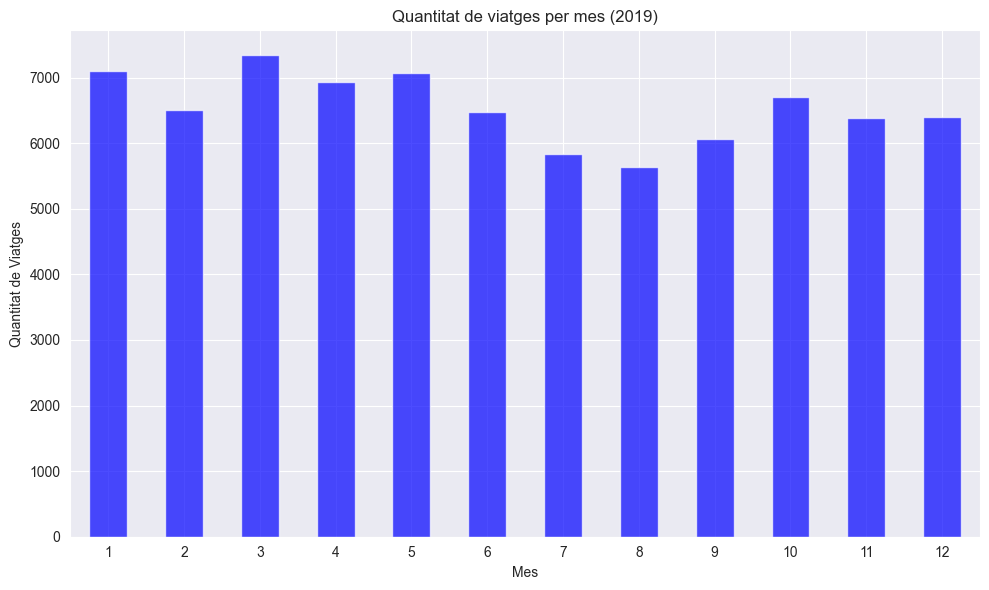

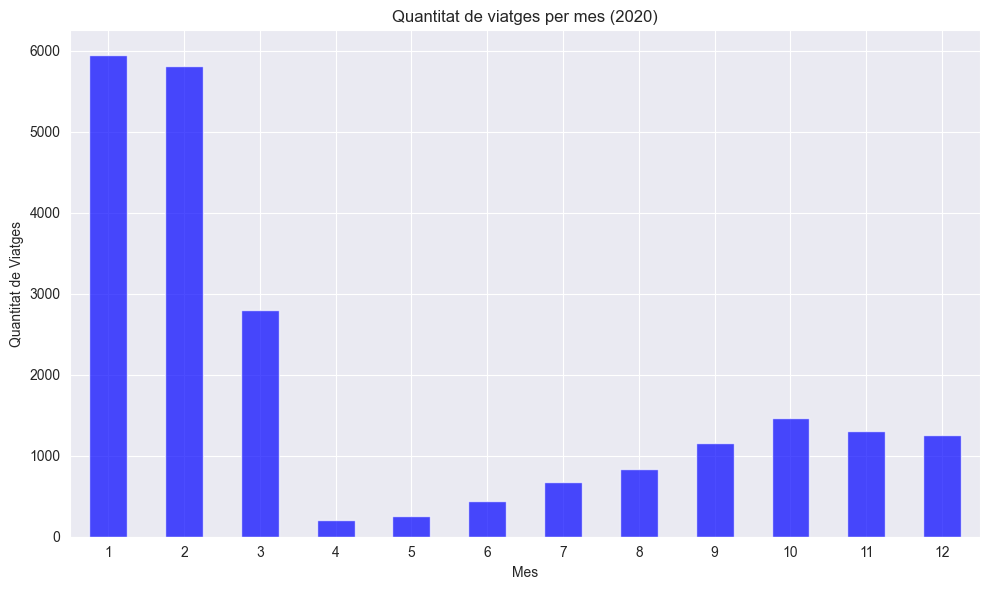

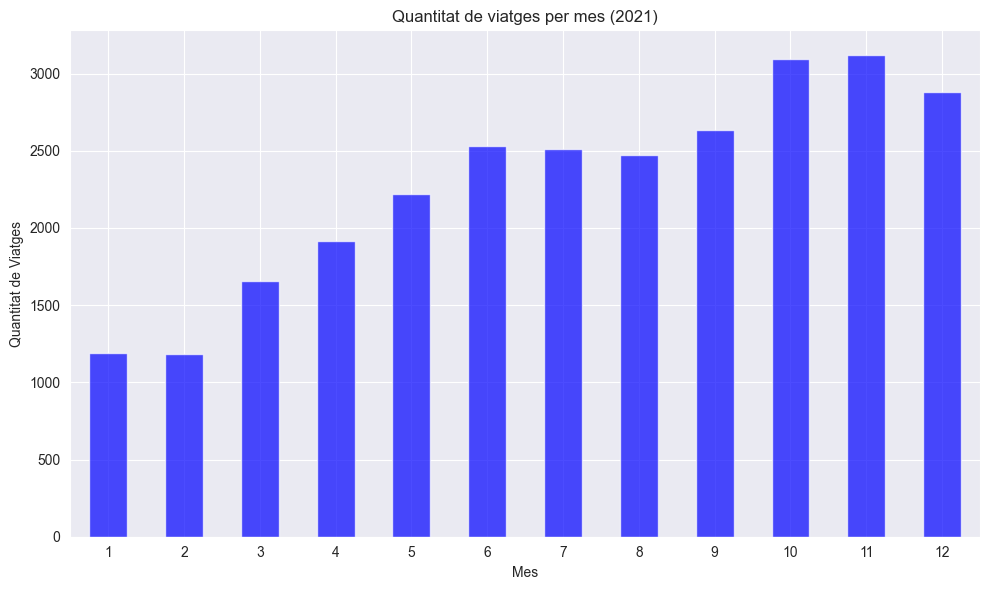

In [18]:
bar_plot(
    df=df[df['tpep_pickup_datetime'].dt.year == 2019],
    column='tpep_pickup_datetime',
    xlabel='Mes',
    ylabel='Quantitat de Viatges',
    title='Quantitat de Viatges per Mes (2019)'
)

bar_plot(
    df=df[df['tpep_pickup_datetime'].dt.year == 2020],
    column='tpep_pickup_datetime',
    xlabel='Mes',
    ylabel='Quantitat de Viatges',
    title='Quantitat de Viatges per Mes (2019)'
)

bar_plot(
    df=df[df['tpep_pickup_datetime'].dt.year == 2021],
    column='tpep_pickup_datetime',
    xlabel='Mes',
    ylabel='Quantitat de Viatges',
    title='Quantitat de Viatges per Mes (2019)'
)

+ És el comportament que esperàveu? Per què?

> Resposta: Es el comportament que esperavem ja que el covid va aparèixer a partir del març del 2020, i com vam entrar en quarantena, l'utilització de taxis va disminuir fins que es va treure la quarantena i es va tornar a una utilització mes normal pero sense tornar a la mateixa quantitat que preCovid.

+ Visualitza **quants passatgers hi ha per taxi i per any**. Crea una figura **amb tres subfigures** (una per any) on es pugui veure el recompte de passatgers per any. Després repetiu el mateix gràfic visualitzant el % (utilitzeu el paràmetre *norm = True*).

In [19]:
def passengers_taxi_year(df, ylim, xlabel, ylabel, title, norm = False):
    """
    Funció que visualitza quants passatgers hi ha per taxi i per any
    """
    # CREEM una copia per aixi no crear noves columnes
    df_copy = df.copy()

    # Afegim a la copia l'any
    df_copy['year'] = df_copy['tpep_pickup_datetime'].dt.year

    # SUBFIGURES
    fig, ax = plt.subplots(figsize=(8, 5))

    # Contem el nombre de passatgers
    passengers_per_year = df_copy.groupby('year')['passenger_count'].sum()

    # Si norm = True, sobrescribim el calcul anterior, i mostrem el %
    if norm:
        passengers_per_year = passengers_per_year / passengers_per_year.sum()

    # GRAFIC DE BARRAS
    passengers_per_year.plot(kind='bar', ax=ax, color='blue', alpha=0.7)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_ylim(ylim)
    plt.tight_layout()
    plt.show()
    #Eliminem la copia
    del df_copy

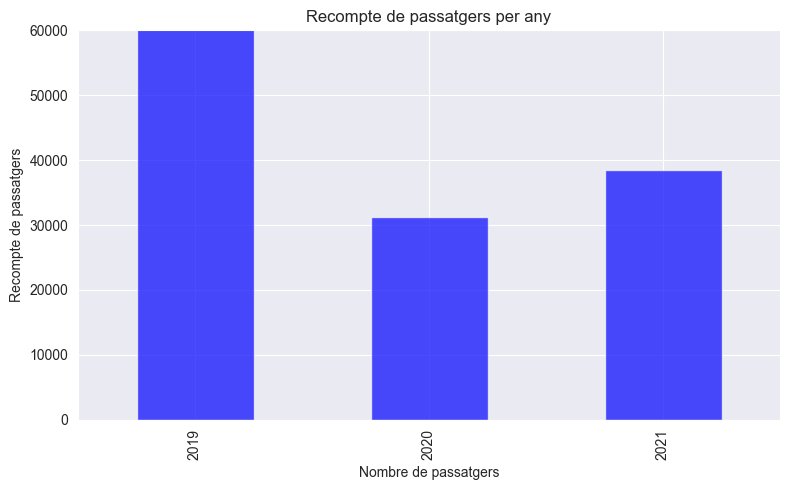

In [20]:
passengers_taxi_year(df,
                     (0, 60000),
                     'Nombre de passatgers',
                     'Recompte de passatgers',
                     'Recompte de passatgers per any')

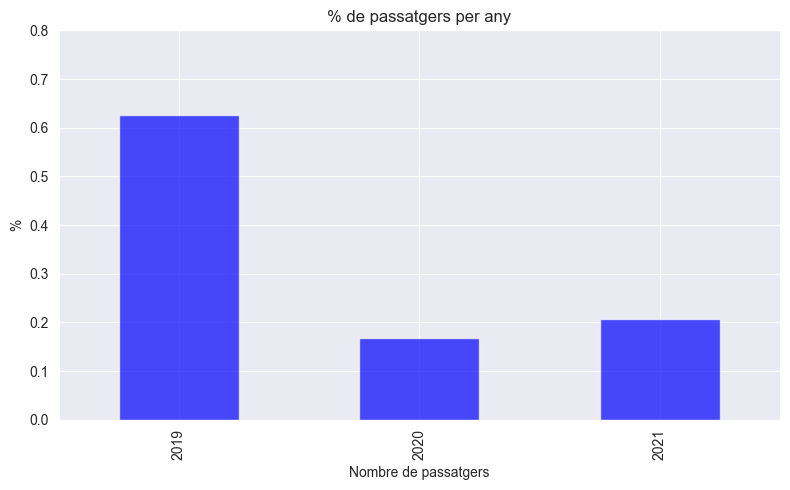

In [21]:
passengers_taxi_year(df,
                     (0, 0.8),
                     'Nombre de passatgers',
                     '%',
                     '% de passatgers per any',
                     norm = True)

+ Com descriurieu de forma **qualitativa** l'efecte de la covid sobre els taxis en base a l'anàlisi fet fins ara?

> Resposta:

+ Podeu calcular de forma **quantitativa** la magnitud dels canvis que heu detectat? Escriviu una funció que calculi una sèrie d'indicadors quantitatius (per exemple, quin canvi percentual hi ha en el nombre de viatges d'una sola persona, etc.).

In [22]:
def calculate_indicators(df):
    """
    Función que calcula indicadores cuantitativos basados en una copia del DataFrame de datos y por año.
    """
    # Copia per no afegir columnes
    df_copy = df.copy()

    # Total de viatjes
    total_trips_original = len(df_copy)

    # Contem els viatjes realitzats per un passatger
    solo_passenger_trips_total = df_copy[df_copy['passenger_count'] == 1]
    total_solo_passenger_trips_total = len(solo_passenger_trips_total)

    # Fem el percentatje per saber la relacio entre viatjes totals i viatjes d'una sola persona,
    # es a dir, es veura quina disminució hi ha entre aquestos dos tipus de viatjes
    change_percent_solo_passenger_total = ((total_solo_passenger_trips_total - total_trips_original) / total_trips_original) * 100

    indicators = {
        'Total de viajes originales': total_trips_original,
        'Total de viajes de una sola persona': total_solo_passenger_trips_total,
        'Cambio porcentual en viajes de una sola persona': change_percent_solo_passenger_total,
    }

    # Creem un diccionari per afegir els viatjes anuals
    indicators_by_year = {}

    # Fem la columna del any en la copia per extreure la quantitat de viatjes anuals
    df_copy['year'] = df_copy['tpep_pickup_datetime'].dt.year
    unique_years = df_copy['year'].unique()

    #Per cada any, realitzem els mateixos calculs
    for year in unique_years:
        # Filtrem les dades...
        year_data = df_copy[df_copy['year'] == year]

        # Total de viatjes anuals
        total_trips_anual = len(year_data)

        # Contem els viatjes realitzats per un passatger
        solo_passenger_trips_anual = year_data[year_data['passenger_count'] == 1]
        total_solo_passenger_trips_anual = len(solo_passenger_trips_anual)

        # Fem el percentatje per saber la relacio entre viatjes totals i viatjes d'una sola persona,
        # es a dir, es veura quina disminució hi ha entre aquestos dos tipus de viatjes en un sol any
        change_percent_solo_passenger_anual = ((total_solo_passenger_trips_anual - total_trips_anual) / total_trips_anual) * 100

        # Afegim al diccionari per any l'informació anterior
        indicators_by_year[year] = {
            'Total de viatjes': total_trips_anual,
            'Total de viatjes anuals de una sola persona': total_solo_passenger_trips_anual,
            'Cambio porcentual en viajes de una sola persona': change_percent_solo_passenger_anual,
        }

    # Imprimim el diccionari
    for year, indicators in indicators_by_year.items():
        print(f'Any {year}:')
        for key, value in indicators.items():
            print(f'{key}: {value}')
        print()

    # Imprimim els valors totals
    print(f'RESUM TOTAL')
    for key, value in indicators.items():
        print(f'{key}: {value}')

    #Eliminem la copia
    del df_copy
    return

indicadores = calculate_indicators(df)

Any 2019:
Total de viatjes: 78479
Total de viatjes anuals de una sola persona: 57497
Cambio porcentual en viajes de una sola persona: -26.73581467653767

Any 2020:
Total de viatjes: 22170
Total de viatjes anuals de una sola persona: 16939
Cambio porcentual en viajes de una sola persona: -23.594948128101038

Any 2021:
Total de viatjes: 27413
Total de viatjes anuals de una sola persona: 20736
Cambio porcentual en viajes de una sola persona: -24.35705687082771

RESUM TOTAL
Total de viatjes: 27413
Total de viatjes anuals de una sola persona: 20736
Cambio porcentual en viajes de una sola persona: -24.35705687082771


+ Descriviu els resultats quantitatius que heu obtingut.

> Resposta: Es pot veure una disminucio del 27.36% de viatjes entre una persona i el total de viatjes. Cosa que com es pot veure amb el covid, la disminució ha sigut menor amb el covid, es a dir, amb el covid s'han realitzat mes viatjes d'una sola persona.

## 4. Quantitat de viatges

Fins ara hem vist la quantitat de viatges que hi ha hagut a nivell de mesos i anys.

Ara podem estudiar l'efecte de la covid en el nombre de trajectes si **agreguem** les dades per hores, dies de la setmana, setmanes de l'any, etc.

### Exercici D

+ Escriu una funció genèrica que visualitzi el nombre de trajectes per les agregacions de dades comentades i per cada any. Fes servir gràfics de línies discontínues (una línia per cada any) per veure'n l'evolució i marca amb una rodona o creu allà on està el valor.

In [23]:
def visualize_trips(df, columns, title, xlabel, ylabel):
    """
    Funció que visualitza els viatges per diferents agregacions de dades
    """

    # Copia per no afegir columnes
    df_copy = df.copy()

    #Afegim les dades per hora, dia i setmana
    df_copy['pickup_hour'] = df_copy['tpep_pickup_datetime'].dt.hour
    df_copy['dropoff_hour'] = df_copy['tpep_dropoff_datetime'].dt.hour
    df_copy['pickup_day'] = df_copy['tpep_pickup_datetime'].dt.day
    df_copy['dropoff_day'] = df_copy['tpep_dropoff_datetime'].dt.day
    df_copy['pickup_week'] = df_copy['tpep_pickup_datetime'].dt.isocalendar().week
    df_copy['dropoff_week'] = df_copy['tpep_dropoff_datetime'].dt.isocalendar().week



    # Creem un grafic de lineas discontinues per any
    unique_years = df_copy['tpep_pickup_datetime'].dt.year.unique()


    #Per cada columna que volguem mostrar
    for col in columns:
        plt.figure(figsize=(10, 6))
        #Per cada any
        for year in unique_years:
            #Agafem les dades del any en el que estem recorrent
            year_data = df_copy[df_copy['tpep_pickup_datetime'].dt.year == year]
            #Contem la quantitat que hi ha a la columna que volem mostrar
            group_data = year_data.groupby(col).size().reset_index(name='count')
            #Mostrem el reconte amb una rodona on hi ha el valor
            plt.plot(group_data['count'], label=f'Año {year}', marker='o')
            for i, count in enumerate(group_data['count']):
                #Mostrem la dada en text
                plt.annotate(str(count), (i, count), textcoords="offset points", xytext=(0, 10), ha='center')


        plt.title(f'{title} ({col})')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend()
        plt.grid()
        plt.show()


    del df_copy


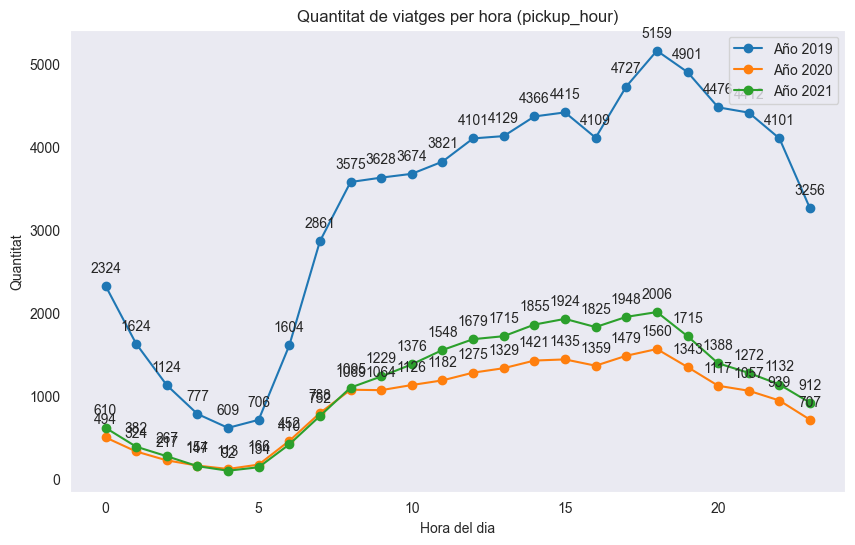

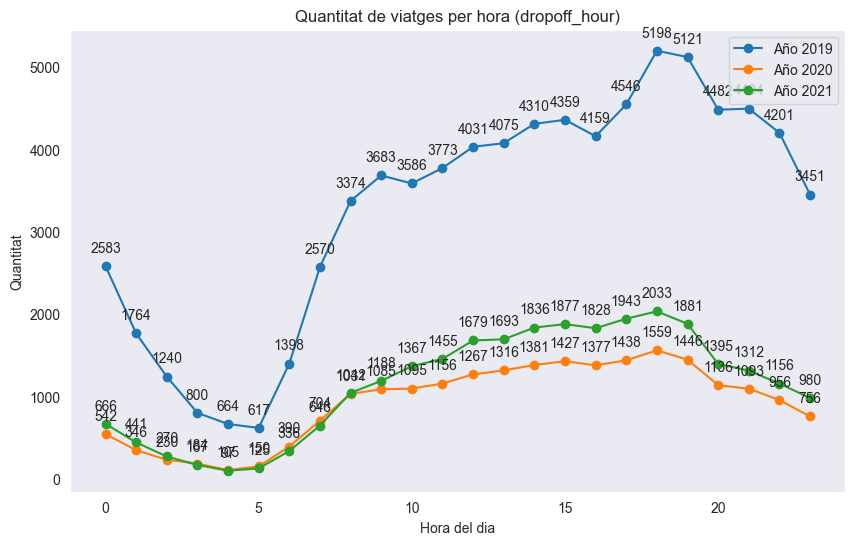

In [24]:
visualize_trips(df,
                ['pickup_hour', 'dropoff_hour'],
                title = 'Quantitat de viatges per hora',
                xlabel = 'Hora del dia', ylabel = 'Quantitat')

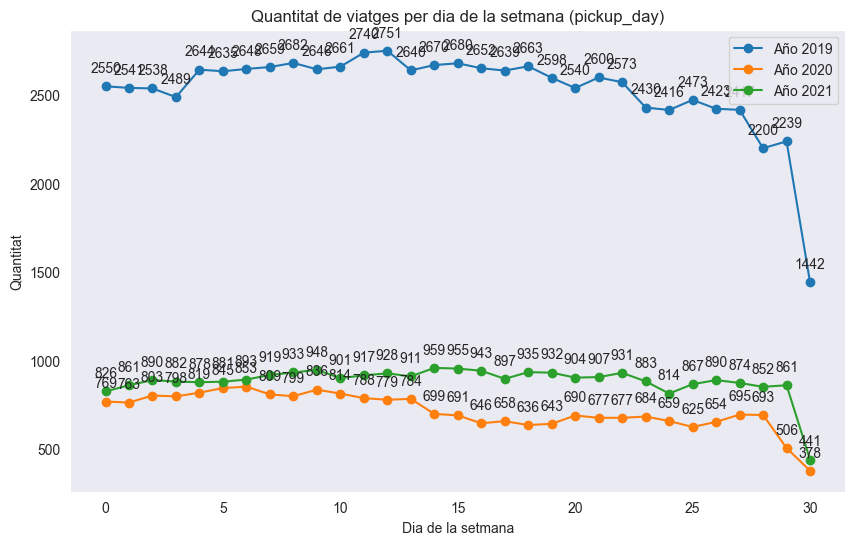

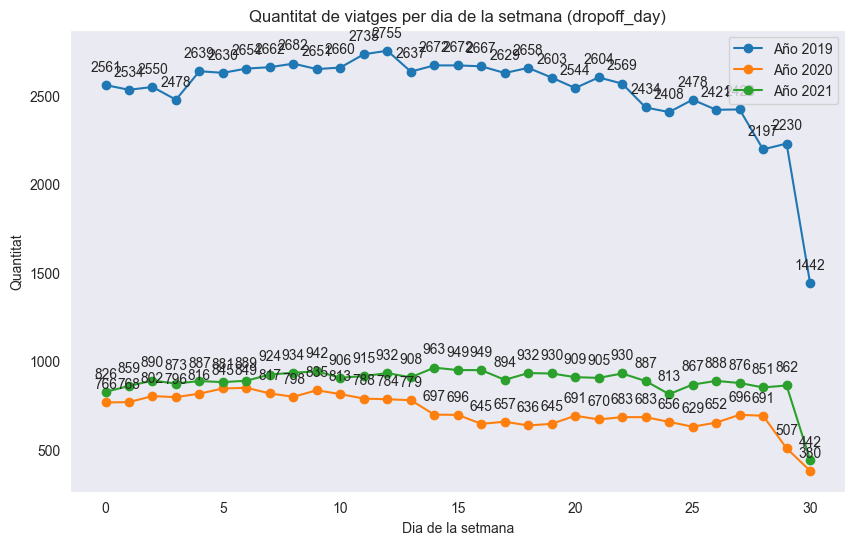

In [25]:
visualize_trips(df,
                ['pickup_day', 'dropoff_day'],
                title = 'Quantitat de viatges per dia de la setmana',
                xlabel = 'Dia de la setmana',
                ylabel = 'Quantitat')

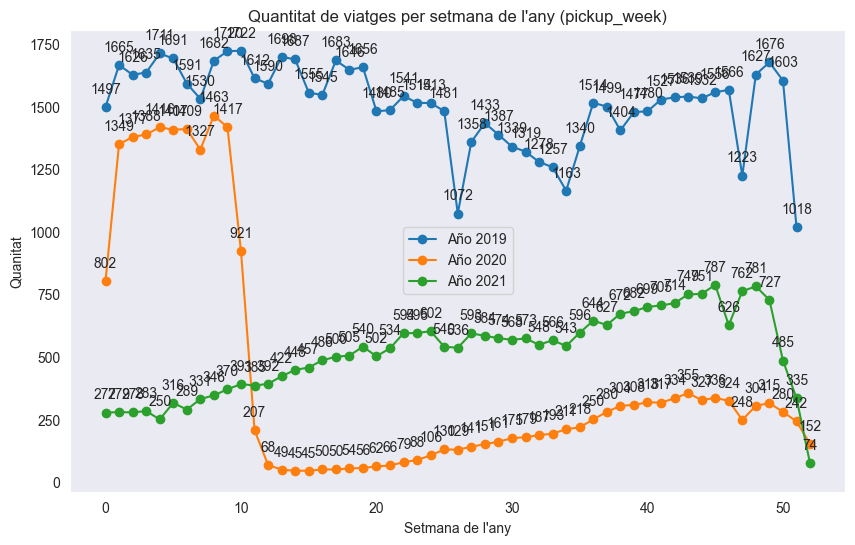

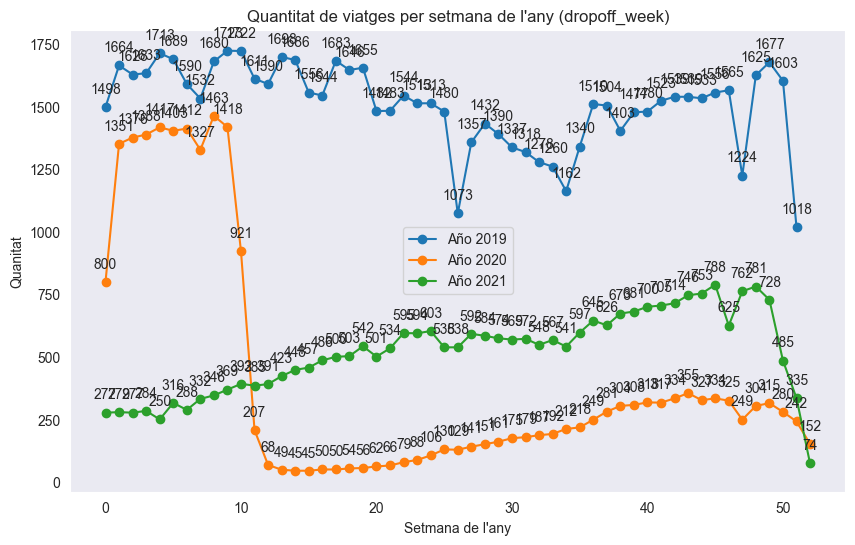

In [26]:
visualize_trips(df,
                ['pickup_week', 'dropoff_week'],
                title = 'Quantitat de viatges per setmana de l\'any',
                xlabel = 'Setmana de l\'any',
                ylabel = 'Quanitat')

+ Com descriurieu l'efecte de la covid en cada cas (si és que en té)? Quin creieu que és el motiu?

> Resposta:
> **Per hora**: Per hora es pot veure que l'augment al pas de les hores es diferent, al any 2019 on podia aumentar fins 5300 viatjes a la hora, en canvi, als altres anys, unicament fins 2000 viatjes a la hora
> **Per dia**: Es pot veure que diariament i cada any, es pot veure que el 2019 (any normal) hi habia molt moviment, en canvi, pels altres anys, hi havia el efecte covid, on els viatjes eren menors
> **Per setmana**: En aquestos grafics es pot veure l'efecte covid totalment, on els viatjes eran normals, fins la setmana 10-11 del 2020, i com va passant el covid durant aquestos dos anys, i com a finals del 2021, cau una altre vegada per les oles de covid.

## 5. Relació distancia, temps i velocitat

A les dades tenim la **distància** que ha recorregut el taxi en cada viatge i de la informació temporal podem extreure també la **durada** d'aquest.

Ara explorarem com la covid va afectar les distàncies i les durades dels viatges, i també la velocitat dels taxis. També ens preguntarem si la densitat de trànsit va variar.

### Exercici E

+ Per començar, escriu una funció que visualitzi els **histogrames** de distància i durada per any.

In [27]:
def visualize_histograms(df, column, title, xlabel, ylabel, xlim):
    """
    Funció que crea un histograma a partir de la informació que conté la columna del dataframe
    """
    # obtenim els anys del dataframe, amb el pickup time, per evitar el 2022 (va haber un tio que es va pujar el últim dia de 2021 per la nit, i va fer el drop off a 2022)
    years = df['tpep_pickup_datetime'].dt.year.unique()

    # Crear figura i eixos histograma
    fig, axs = plt.subplots(len(years), figsize=(10, 6*len(years)))

    # Crear un histograma por año
    for i, year in enumerate(years):
        # Filtrar el dataframe per any
        df_year = df[df['tpep_pickup_datetime'].dt.year == year]

        values = df_year[column]

        # Creem titol histograma
        year_title = f'{title} - {year}'

        # Generar histograma per any
        axs[i].hist(values, bins=30, alpha=0.5, color ='green')
        axs[i].set_title(year_title)
        axs[i].set_xlabel(xlabel)
        axs[i].set_ylabel(ylabel)
        axs[i].set_xlim(xlim)

    # Ajustar la disposición de los subgráficos
    plt.tight_layout()

    # Mostrar los histogramas
    plt.show()

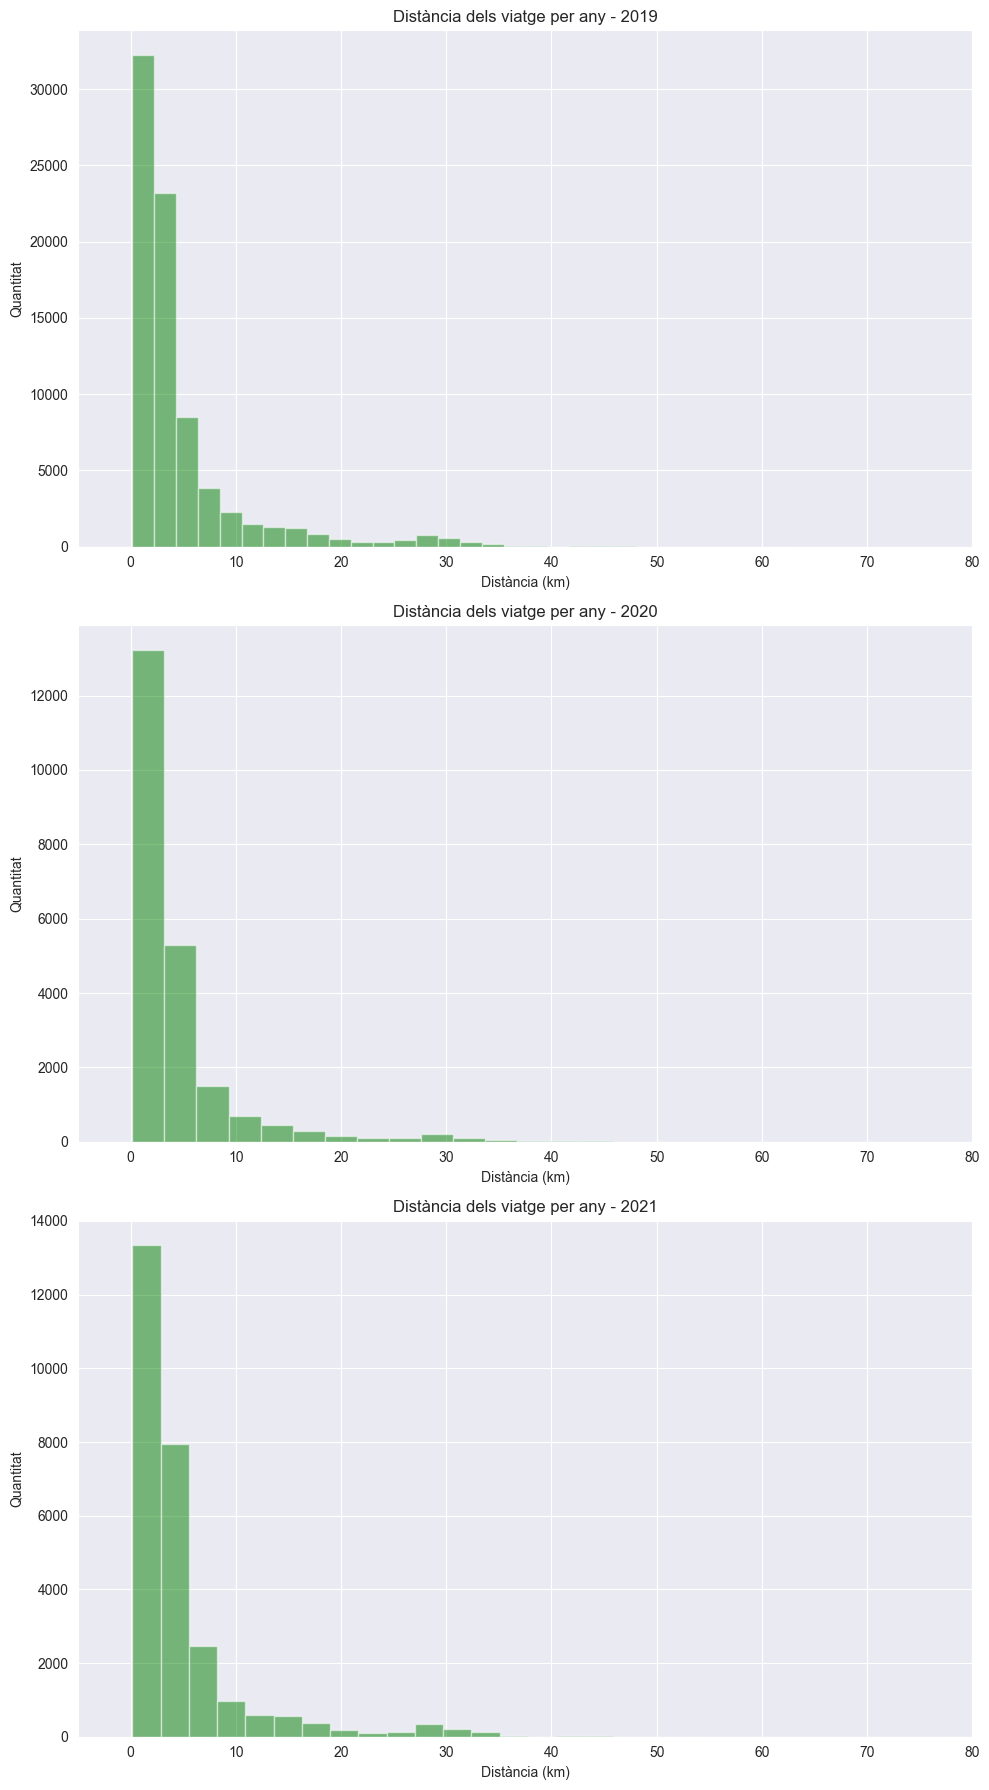

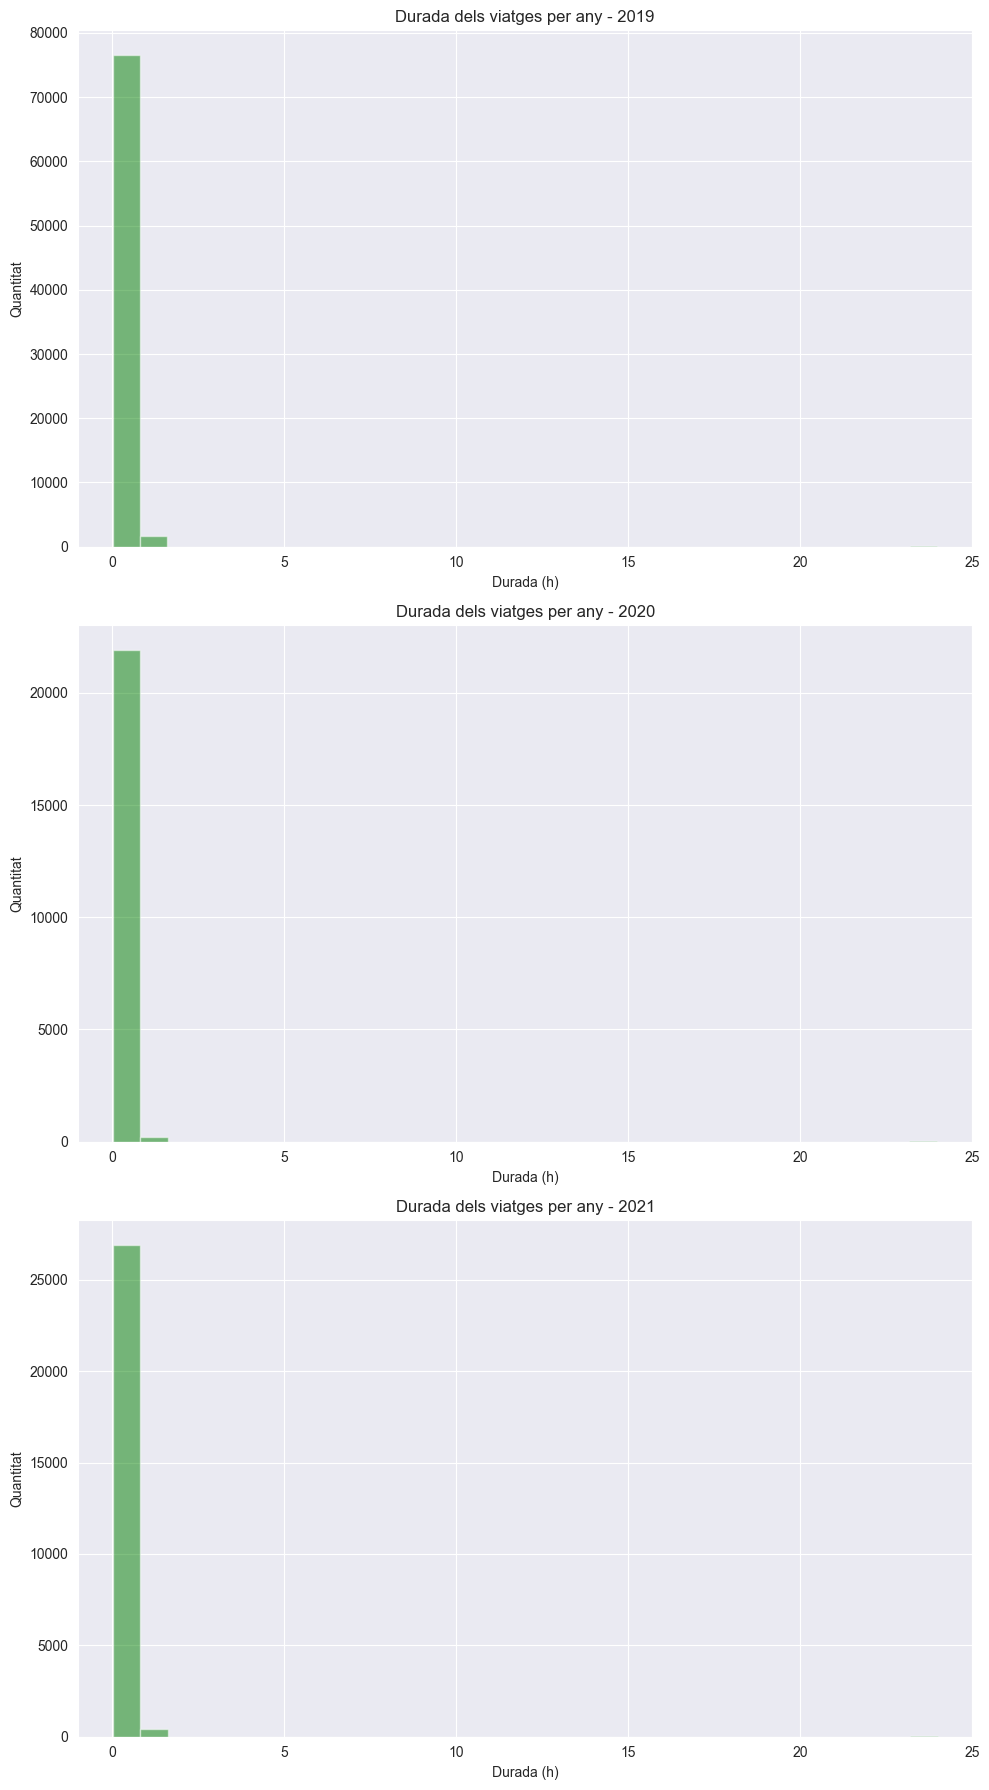

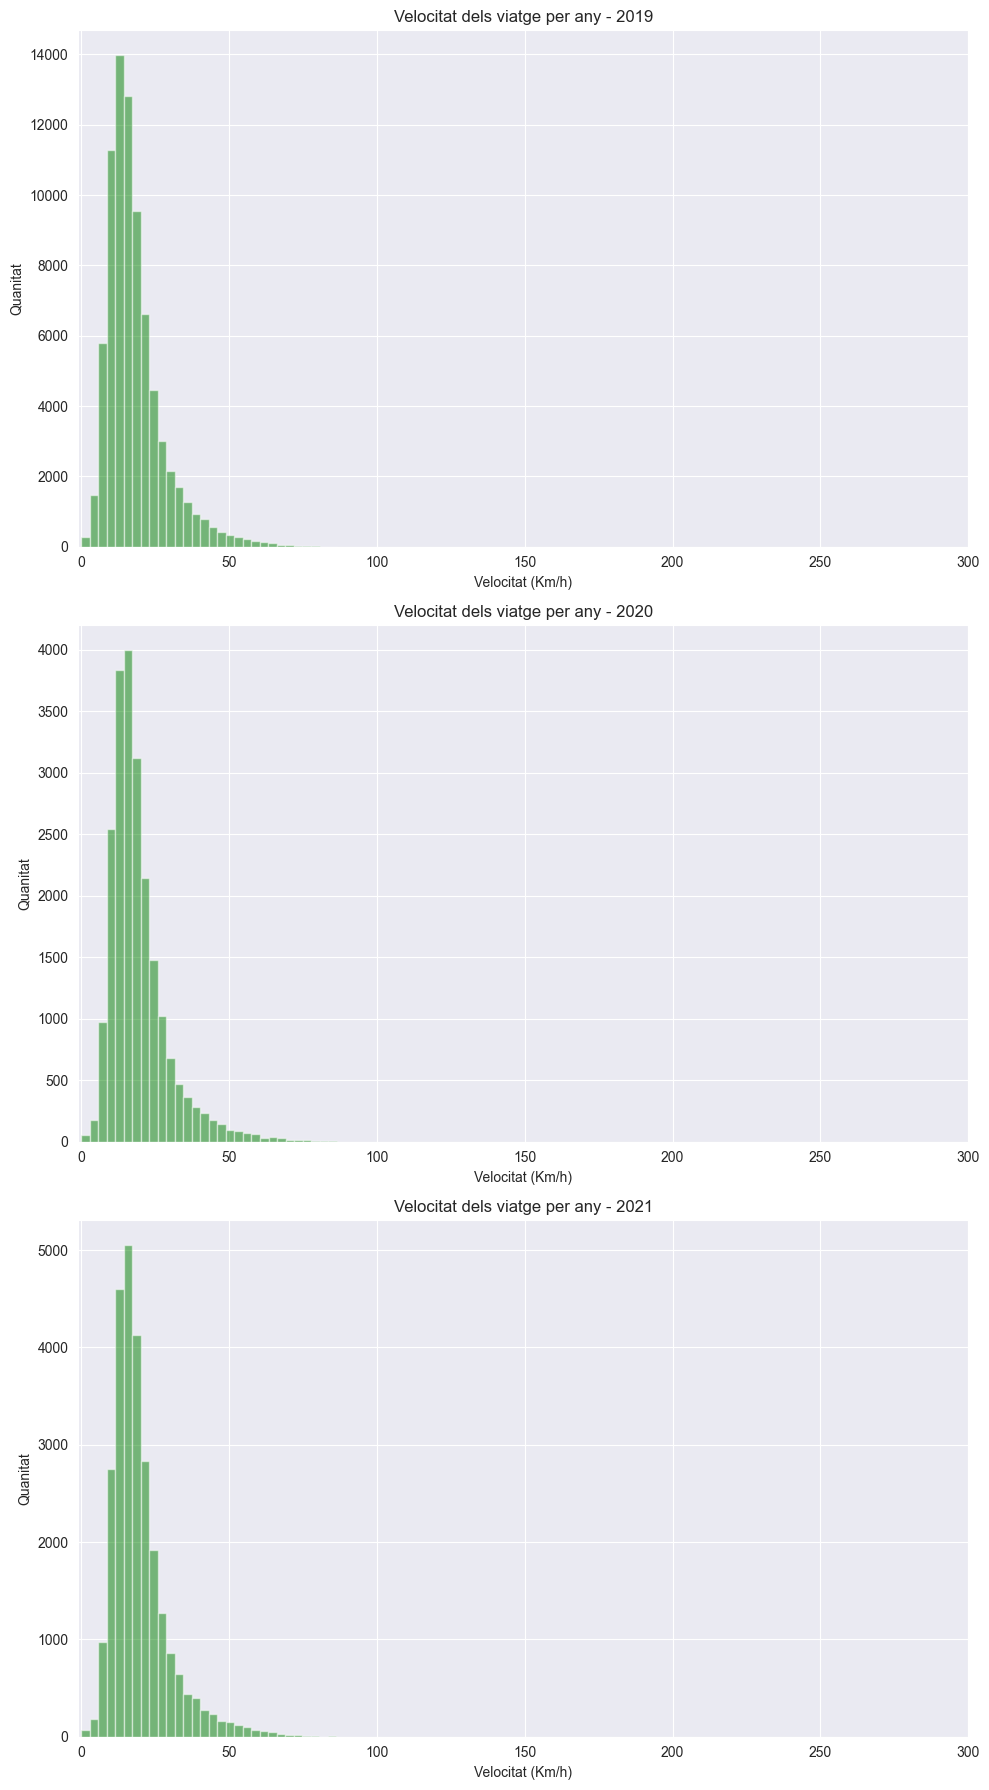

In [28]:
visualize_histograms(df, 'trip_distance', title = 'Distància dels viatge per any',
                     xlabel = 'Distància (km)', ylabel = 'Quantitat', xlim = (-5, 80))

visualize_histograms(df, 'trip_duration', title = 'Durada dels viatges per any',
                     xlabel = 'Durada (h)', ylabel = 'Quantitat', xlim = (-1, 25) )

visualize_histograms(df, 'speed', title = 'Velocitat dels viatge per any',
                     xlabel = 'Velocitat (Km/h)', ylabel = 'Quanitat', xlim = (-1, 300) )

* Com creieu que la covid va afectar les distàncies i durades dels viatges?

> Resposta: El covid-19, va reduir molt la quantitat de viatges i la qualitat del servei. El que té sentit amb les dades mostrades, ja que la durada i les distancies també van ser reduides. La gent viatjava menys i els pocs viatges que es feien eren més curts.

* I a la velocitat dels taxis?

> Resposta: La velocitat no varia molt en relació a abans del covid-19, ja que els límits de velocitat són els que son, i els taxis has moures en capital o per fora d'ella, segueixen respectant els límits establerts.

## 6. Visualització de les localitzacions dels viatges

In [29]:
column_names = df.columns.tolist()
print(column_names)

['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'total_amount', 'trip_duration', 'speed']


Només tenim la ID d'una localització, per tant, necessitem aconseguir la latitud i la longitud.

La mateixa pàgina dels taxis ens dóna el fitxer *taxi_zones.zip*, però primer cal que convertim les dades de coordenades amb format WGS84.

Podem utilitzar aquesta web: https://mygeodata.cloud/

In [30]:
from utils import get_lat_lon, draw_region_map, draw_zone_map

In [31]:
sf = shapefile.Reader('data/geodata/taxi_zones.shp')

fields_name = [field[0] for field in sf.fields[1:]]
shp_dic = dict(zip(fields_name, list(range(len(fields_name)))))
attributes = sf.records()
shp_attr = [dict(zip(fields_name, attr)) for attr in attributes]

In [32]:
df_loc = pd.DataFrame(shp_attr).join(get_lat_lon(sf, shp_dic).set_index("LocationID"), on="LocationID")
df_loc.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,longitude,latitude
0,1,0.116357,0.000782,Newark Airport,1,EWR,9.366817e+05,190522.130278
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,1.033536e+06,161853.982300
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,1.027136e+06,254730.010849
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,9.904240e+05,203100.040432
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,9.321332e+05,139954.541936


In [33]:
column_names = df_loc.columns.tolist()
print(column_names)

['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough', 'longitude', 'latitude']


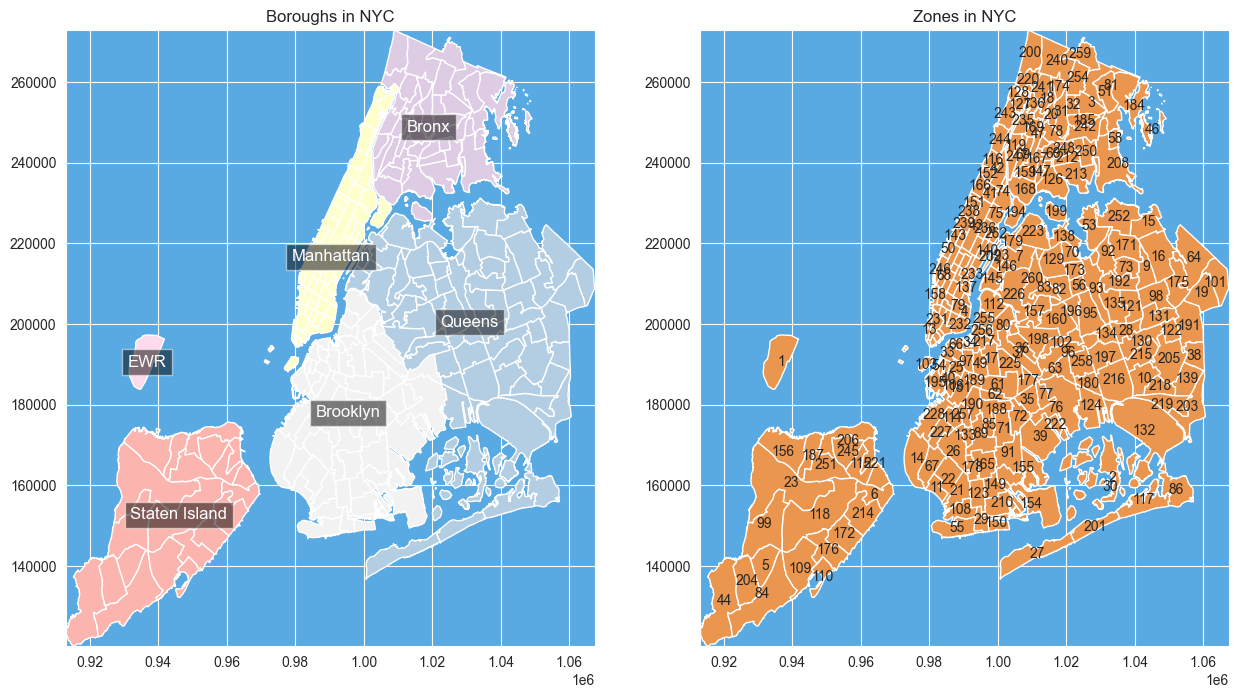

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax = plt.subplot(1, 2, 1)
ax.set_title("Boroughs in NYC")
draw_region_map(ax, sf, shp_dic)
ax = plt.subplot(1, 2, 2)
ax.set_title("Zones in NYC")
draw_zone_map(ax, sf, shp_dic)

### Exercici F

+ Ara teniu dos dataframe que necessitem unir. Utilitza la funció *merge* de Pandas per crear un nou dataframe (conserva el dataframe `df`), anomenat `merge`, que contingui la longitud i latitud (del punt de recollida i del punt de destí) a cada fila.

In [66]:
# Fem copia per conservar el data frame original
merge = df.copy()

# Fusionem els dataframe per afegir dos columnes més PuLocationID
merge = merge.merge(df_loc[['LocationID', 'longitude', 'latitude']], left_on='PULocationID', right_on='LocationID', how='left')

merge = merge.merge(df_loc[['LocationID', 'longitude', 'latitude']], left_on='DOLocationID', right_on='LocationID', how='left')

# Renombrem les columnes resultants
merge.rename(columns={'longitude_x': 'PULongitude', 'latitude_x': 'PULatitude', 'longitude_y': 'DOLongitude', 'latitude_y': 'DOLatitude'}, inplace=True)

# Eliminem columnes duplicades
merge.drop(['LocationID_x', 'LocationID_y'], axis=1, inplace=True)


In [67]:
merge.shape

(128245, 15)

In [68]:
merge.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,trip_duration,speed,PULongitude,PULatitude,DOLongitude,DOLatitude
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,2.414010,151,239,1,7.0,9.95,0.111111,21.726090,993048.448746,229960.162885,990139.871381,224918.916683
1,2019-01-01 00:53:09,2019-01-01 01:01:16,1.0,3.073839,148,137,2,8.5,9.80,0.135278,22.722427,986837.853249,201264.700017,990575.781160,209001.824133
2,2019-01-01 00:54:46,2019-01-01 01:03:13,1.0,2.253076,249,164,1,7.5,11.40,0.140833,15.998173,983705.301510,206915.068701,988216.720995,212188.335350
3,2019-01-01 00:09:29,2019-01-01 00:12:29,2.0,1.078258,162,137,2,4.0,5.30,0.050000,21.565156,991876.747966,215015.150630,990575.781160,209001.824133
4,2019-01-01 00:29:00,2019-01-01 00:46:19,1.0,4.361311,161,262,1,13.5,17.76,0.288611,15.111377,990433.407940,215448.355221,999443.497242,222247.381595


In [38]:
column_names = merge.columns.tolist()
print(column_names)

['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'total_amount', 'trip_duration', 'speed', 'PULongitude', 'PULatitude', 'DOLongitude', 'DOLatitude']


In [39]:
column_names = df_loc.columns.tolist()
print(column_names)

['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough', 'longitude', 'latitude']


In [40]:
column_names = df.columns.tolist()
print(column_names)

['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'total_amount', 'trip_duration', 'speed']


## 7. Quines zones de NY tenen més recollides i quines zones tenen més arribades?

En aquest apartat volem conèixer i visualitzar les zones on els taxis són més utilitzats.

El primer pas és ordenar i guardar en una variable els llocs més comuns en la recollida i el destí.

### Exercici G
+  Escriu una funció `show_top_n` que imprimeix els 5 llocs més freqüents de recollida i els 5 llocs més freqüents d'arribada, per cada any.

In [41]:
import pandas as pd

n_top = 5
'''
Hem modificat una mica la capcelera de la funció per aclarar-nos més.
my_dataframe -> Serà un dataframe que crearem BUIT, on guardarem el output esperat
column -> es la columna que estudiarem, per comptar el recompte de frequencia, en aquest cas 'DOLocationID' i 'POLocationID'
merge_df -> serà el dataframe del exercici 6, així podrem estudiar les columnes abans mencionades mentres tenim
Hem decidit utilitzar aquest abans del df_loc
accés a la data (per extreure el any)

ACLARACIÓ: El dataframe resultant tindrà la seguent estructura -> id, DO/PO ID, frequencia i any.
Hem decidit cambiar el nom de trip_distance a frequencia, així es més fàcil d'entendre
'''

def show_top_n(my_dataframe, column, merge_df, n_top=n_top):
    """
    Funció que mostra les ubicacions més frequents per ANY
    """
    # Agafa la columna pickup_datetime i ens quedem amb el any (com hem fet als altres exs)
    years = merge_df['tpep_pickup_datetime'].dt.year.unique()

    # Per cada any iterem
    for year in years:
        # Filtrem data frame per any
        df_year = merge_df[merge_df['tpep_pickup_datetime'].dt.year == year]
         # i ens quedem amb el valor de la columna
        values = df_year[column]
        # Aqui ens quedem amb els N valors més grans
        n_values = values.value_counts().nlargest(n_top)

        # dataframe temporal per comptar els viatges que s'han fet (ID de uni, any)
        temp_df = pd.DataFrame({column: n_values.index, 'frequencia': n_values.values})
        temp_df['year'] = year

        # Afegim els valors al data frame (recordem que estara buit)
        my_dataframe = pd.concat([my_dataframe, temp_df])

    # el que fem aqui es ordenar, primer el any (volem 5 per 2019, 2020 i 2021) i després la frequencia
    top = my_dataframe.sort_values(['year', 'frequencia'], ascending=[True, False]).reset_index(drop=True)
    return top

In [42]:
# creem el dataframe buit
my_dataframe = pd.DataFrame()

# Generar dataframe top_pu
top_pu = show_top_n(my_dataframe, 'PULocationID', merge)
print('Dataframe top_pu:')
print(top_pu)

print()

Dataframe top_pu:
    PULocationID  frequencia  year
0            237        3408  2019
1            161        3303  2019
2            236        3120  2019
3            186        2904  2019
4            162        2883  2019
5            237        1082  2020
6            236        1051  2020
7            161         906  2020
8            162         778  2020
9            170         761  2020
10           237        1477  2021
11           236        1276  2021
12           161        1022  2021
13           132         946  2021
14           142         933  2021



In [43]:
# creem el dataframe buit
my_dataframe = pd.DataFrame()

# Generar dataframe top_pu
top_do = show_top_n(my_dataframe, 'DOLocationID', merge)
print('Dataframe top_do:')
print(top_do)

print()

Dataframe top_do:
    DOLocationID  frequencia  year
0            236        3290  2019
1            161        3204  2019
2            237        3156  2019
3            170        2462  2019
4            162        2437  2019
5            236        1035  2020
6            237         936  2020
7            161         782  2020
8            141         681  2020
9            170         654  2020
10           236        1273  2021
11           237        1221  2021
12           161         954  2021
13           170         859  2021
14           239         828  2021



Visualitzem amb un mapa de calor quines són les zones més recurrents.

{236: 3290, 161: 3204, 237: 3156, 170: 2462, 162: 2437}


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

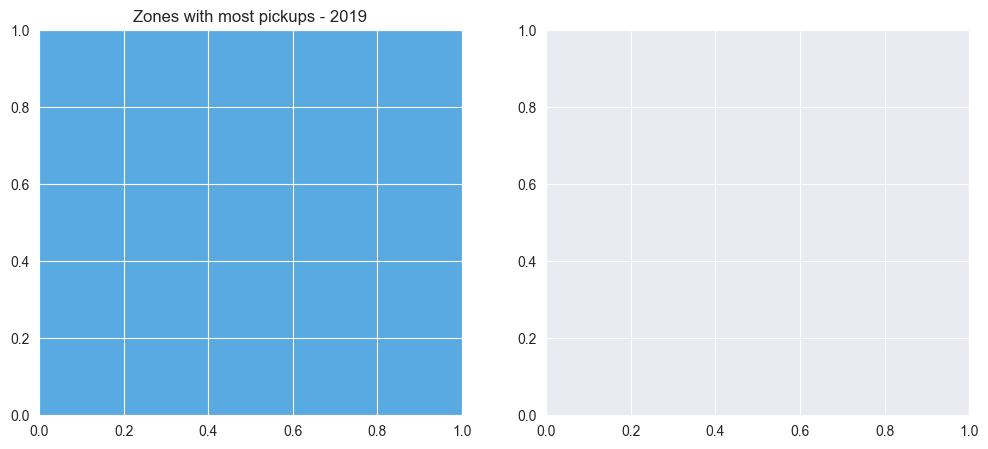

In [44]:
for year in YEARS:

    PUcount = {k:v for k, v in top_do[top_do.year == year][['DOLocationID', 'frequencia']].values}
    #testeig
    print(PUcount)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    ax = plt.subplot(1, 2, 1)
    ax.set_title(f"Zones with most pickups - {year}")
    draw_zone_map(ax, sf, shp_dic, heat=PUcount, text=list(PUcount.keys())[:3])
    ax = plt.subplot(1, 2, 2)
    ax.set_title(f"Zones with most drop-offs - {year}")
    draw_zone_map(ax, sf, shp_dic, heat=PUcount, text=list(PUcount.keys())[:3])

+ Per què creieu que la zona de Manhattan té més quantitat de viatges?

> Resposta: Perquè es un punt molt important a la ciutat de New York. Hi ha molta densitat de població i moltes empreses, el que pot sugerir que tots aquests empresaris fassin molts viatges per anar a treballar o tornar a casa, afavorint el constant moviment.
> També pensem que es un gran sentí turístic, i els extrangers no solen alquilar un cotxe per moure's per la ciutat, ho fan directament per Taxi o Uber, el que pot afavorir també a la freqüència. Ademés es un dels districtes més poblats de tota la ciutat.

## 8. Hospitals

Com ha canviat la destinació dels viatges? Hi ha més viatges a les zones on hi ha grans hospitals?

A la següent cel·la us donem la creació manual d'un DataFrame amb la localització més important dels hospitals de Nova York.

In [104]:
hospitals = [('New York’s Presbyterian Lower Manhattan Hospital, NYC, NY, USA', '40.710255', '-74.005058'),
('Manhattan Gastroenterology, NYC, NY, USA', '40.778259', '-73.958092'),
('Stem Cell Therapy Hospital, NYC, NY, USA', '40.601517', '-73.961067'),
('Park Avenue Smiles, Yonkers, NYC, NY, USA', '40.945873', '-73.890671'),
('Cosmetic Dentistry Center, NYC, NY, USA', '40.629234', '-74.026077'),
('Envy Smile Dental Spa, Brooklyn, NYC, NY, USA', '40.607059', '-73.960144'),
('VIVA EVE, Forest Hills, NYC, NY, USA', '40.734291', '-73.849434'),
('Forest Hills Medical Services, Queens, NYC, NY, USA', '40.734310', '-73.849510'),
('Professional Gynecological Services, Brooklyn, NY, NY, USA', '40.689747', '-73.982346'),
('Manhattan Womens Health & Wellness, New York, NY, USA', '40.741997', '-73.986107'),
('Brooklyn Abortion Clinic, Brooklyn, NY, New York, USA', '40.689743', '-73.982368'),
('Brooklyn GYN Place, Brooklyn, NY, USA', '40.692696', '-73.993584'),
('Americas Holistic Doctor, NYC, NY, USA', '40.742531', '-73.985489'),
('NJS Physical Medicine & Rehabilitation, Brooklyn, NY, USA', '40.641621', '-73.956734'),
('DHD Medical, Brooklyn New York, USA', '40.625568', '-73.918320'),
('Workers Compensation Doctor, New York, NY, USA', '40.652225', '-74.006104'),]

hospitals = pd.DataFrame(hospitals, columns = ['Place Name', 'Latitude', 'Longitude'])
hospitals['Latitude'] = hospitals['Latitude'].astype(float)
hospitals['Longitude'] = hospitals['Longitude'].astype(float)
hospitals.head()

,Place Name,Latitude,Longitude
0,New York’s Presbyterian Lower Manhattan Hospit...,40.710255,-74.005058
1,"Manhattan Gastroenterology, NYC, NY, USA",40.778259,-73.958092
2,"Stem Cell Therapy Hospital, NYC, NY, USA",40.601517,-73.961067
3,"Park Avenue Smiles, Yonkers, NYC, NY, USA",40.945873,-73.890671
4,"Cosmetic Dentistry Center, NYC, NY, USA",40.629234,-74.026077


### Exercici H

+ Utilitza la latitud i longitud de cada hospital i la de les zones del dataframe *merge* per veure la relació entre la distribució dels hospitals i la dels viatges. Per fer-ho utilitza els gràfics de dispersió. Recorda que s'entendrà millor si els punts són transparents (paràmetre *alpha*).

+ Després repeteix el mateix gràfic però separat per any.

In [106]:
'''
Merge ->
['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'total_amount', 'trip_duration', 'speed', 'PULongitude', 'PULatitude', 'DOLongitude', 'DOLatitude']
'''

# els hospitals tenen la longitud negativa i els taxis postiva, per que?
def scatter_locations(merge, hospitals):
    """Funció que mostra la distribució dels hospitals i les destinacions dels taxis"""
    plt.figure(figsize=(10, 3))
    plt.scatter(merge['DOLatitude'], merge['DOLongitude'], alpha=0.2, label='Destinos de taxis')
    plt.scatter(hospitals['Latitude'], hospitals['Longitude'], alpha=0.8, color='red', label='Hospitales')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title('Distribución de hospitales y destinos de taxis')
    plt.legend()
    plt.show()

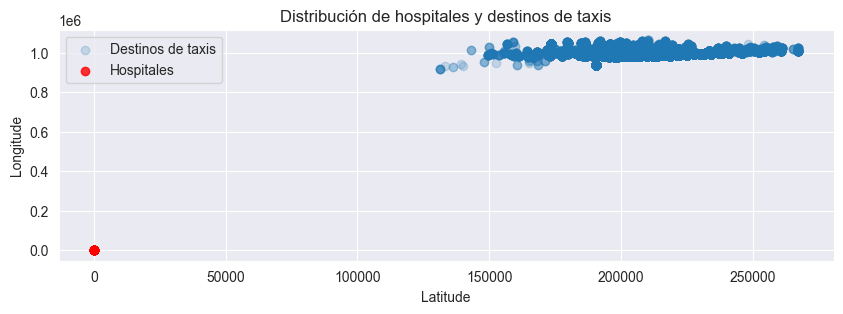

In [109]:
scatter_locations(merge, hospitals)

In [107]:
def scatter_locations_per_year(merge, hospitals):
    """Funció que mostra la distribució dels hospitals i les destinacions dels taxis"""
    # AQUÍ EL TEU CODI
    years = merge['tpep_pickup_datetime'].dt.year.unique()

    for year in years:
        merge_year = merge[merge['tpep_pickup_datetime'].dt.year == year]

        plt.figure(figsize=(10, 6))
        plt.scatter(merge_year['DOLatitude'], merge_year['DOLongitude'], alpha=0.2, label='Destinos de taxis')
        plt.scatter(hospitals['Latitude'], hospitals['Longitude'], alpha=0.8, color='red', label='Hospitales')
        plt.xlabel('Latitude')
        plt.ylabel('Longitude')
        plt.title(f'Distribución de hospitales y destinos de taxis - Año {year}')
        plt.legend()
        plt.show()



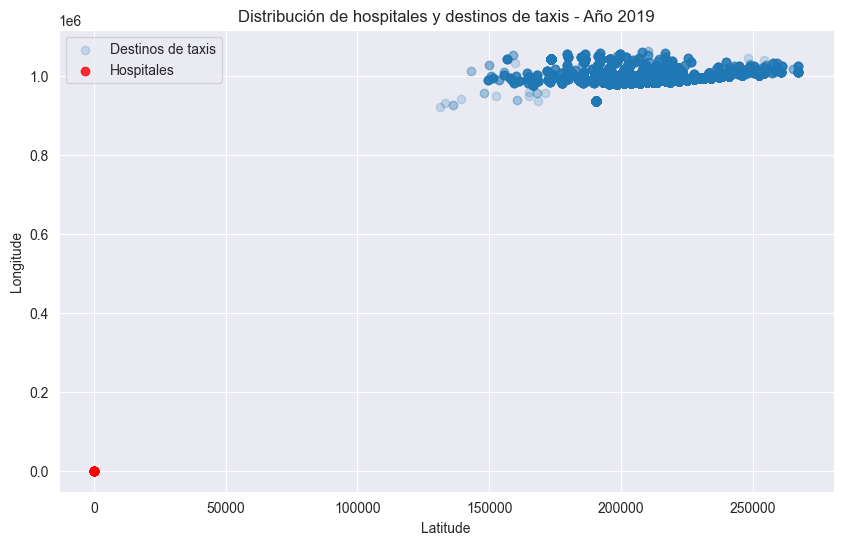

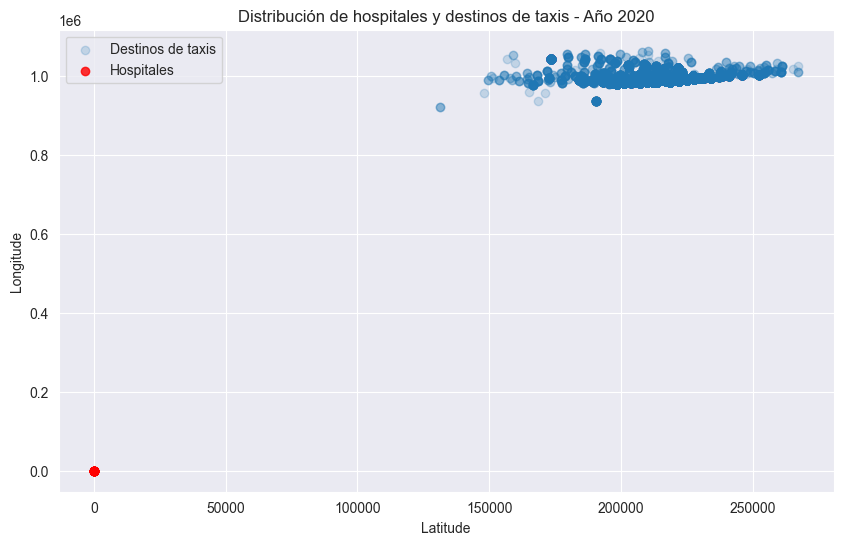

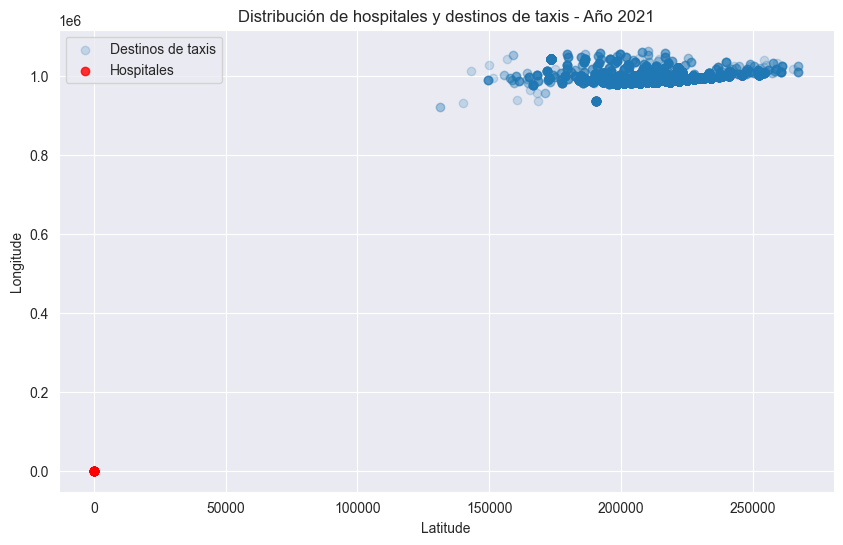

In [108]:
scatter_locations_per_year(merge, hospitals)

* Veus algun comportament interessant per comentar?
> Resposta: